In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x + b

In [2]:
df = pd.read_excel('../adsorption.xlsx')
df

,s,#of N,M,G_Cl_t,G_Cl_b,G_O_t,G_O_b,G_OH_t,G_OH_b,G_OOH_t,G_OOH_b
0,p5,4,Mn,0.80,NaN,1.64,NaN,0.89,NaN,3.86,NaN
1,p5,4,Fe,0.86,NaN,1.77,NaN,0.97,NaN,3.78,NaN
2,p5,4,Co,1.15,NaN,2.77,NaN,1.36,NaN,4.09,NaN
3,p5,4,Ni,1.83,NaN,4.05,NaN,2.23,NaN,4.81,NaN
4,p5,4,Cu,1.90,NaN,4.50,NaN,2.33,NaN,4.86,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67,p5,0,Ag,1.93,1.44,4.92,1.34,2.61,1.20,4.98,233.19
68,p5,0,Ir,0.00,NaN,0.49,0.42,0.24,0.53,3.10,NaN
69,p5,0,Pt,1.47,NaN,3.43,1.24,1.96,1.61,4.80,4.28
70,p5,0,Au,1.97,1.57,4.96,1.78,2.63,1.32,5.00,4.07


In [3]:
df['G_OH_t'] = df['G_OH_t'] -0.3
df['G_OH_b'] = df['G_OH_b'] -0.3
df['G_OOH_t'] = df['G_OOH_t'] -0.3
df['G_OOH_b'] = df['G_OOH_b'] -0.3

In [4]:
tolist = df.values.tolist()

G_Cl = list()
G_O = list()
G_OH = list()
G_OOH = list()

Cl_site = list()
O_site = list()
OH_site = list()
OOH_site = list()

η_OER = list()
η_CER = list()

for i in range(len(tolist)) :
    #Cl
    if tolist[i][3] < tolist[i][4] or np.isnan(tolist[i][4]) :
        G_Cl.append(tolist[i][3])
        Cl_site.append('t')
    elif tolist[i][3] > tolist[i][4] or np.isnan(tolist[i][3]) :
        G_Cl.append(tolist[i][4])
        Cl_site.append('b')
    #elif tolist[i][3] == tolist[i][4] :
    #    G_Cl.append(tolist[i][4])
    #    Cl_site.append('b')

    #OH    
    if tolist[i][7] < tolist[i][8] or np.isnan(tolist[i][8]) :
        G_OH.append(tolist[i][7])
        OH_site.append('t')
        #print(i)
    elif tolist[i][7] > tolist[i][8] or np.isnan(tolist[i][7]) :
        G_OH.append(tolist[i][8])
        OH_site.append('b')
        #print(i)
        
    #O
    #print(tolist[i][5],tolist[i][6])
    if tolist[i][5] < tolist[i][6] or np.isnan(tolist[i][6]) :
        G_O.append(tolist[i][5])
        O_site.append('t')
        #print(i)
    elif tolist[i][5] > tolist[i][6] or np.isnan(tolist[i][5]) :
        G_O.append(tolist[i][6])
        O_site.append('b')
        #print(i)
    
    #OOH
    if tolist[i][9] < tolist[i][10] or np.isnan(tolist[i][10]) :
        G_OOH.append(tolist[i][9])
        OOH_site.append('t')
    elif tolist[i][9] > tolist[i][10] or np.isnan(tolist[i][9]) :
        G_OOH.append(tolist[i][10])
        OOH_site.append('b')
        

    η_CER_temp = np.max([G_Cl[i]-1.36,1.36-G_Cl[i]])
    η_OER_temp = np.max([G_OH[i]-1.23,G_O[i]-1.23*2,G_OOH[i]-1.23*3,1.23*4-G_OOH[i]])

    η_CER.append(η_CER_temp)
    η_OER.append(η_OER_temp)
        

In [5]:
df2 = pd.DataFrame()

In [6]:

df2['#of N'] = df['#of N']
df2['M'] = df['M']
df2['G_Cl'] = G_Cl
df2['G_OH'] = G_OH
df2['G_O'] = G_O
df2['G_OOH'] = G_OOH
df2['η_CER'] = η_CER
df2['η_OER'] = η_OER

df2


,#of N,M,G_Cl,G_OH,G_O,G_OOH,η_CER,η_OER
0,4,Mn,0.80,0.59,1.64,3.56,0.56,1.36
1,4,Fe,0.86,0.67,1.77,3.48,0.50,1.44
2,4,Co,1.15,1.06,2.77,3.79,0.21,1.13
3,4,Ni,1.83,1.93,4.05,4.51,0.47,1.59
4,4,Cu,1.90,2.03,4.50,4.56,0.54,2.04
...,...,...,...,...,...,...,...,...
67,0,Ag,1.44,0.90,1.34,4.68,0.08,0.99
68,0,Ir,0.00,-0.06,0.42,2.80,1.36,2.12
69,0,Pt,1.47,1.31,1.24,3.98,0.11,0.94
70,0,Au,1.57,1.02,1.78,3.77,0.21,1.15


In [7]:
for i in range(len(η_OER)) :
    print(list(df2['M'])[i],η_OER[i])

Mn 1.3599999999999999
Fe 1.44
Co 1.13
Ni 1.5899999999999999
Cu 2.04
Rh 1.12
Pd 2.34
Ag 2.51
Ir 1.04
Pt 1.9000000000000004
Au 3.2199999999999998
Cr 1.88
Mn 1.44
Fe 1.4899999999999998
Co 1.3399999999999999
Ni 1.2000000000000002
Cu 1.8099999999999996
Rh 1.4999999999999996
Pd 1.0
Ag 1.65
Ir 1.3699999999999997
Pt 0.7199999999999998
Au 1.3199999999999998
Cr 2.05
Mn 1.5399999999999996
Fe 1.3599999999999999
Co 1.4499999999999997
Ni 1.2499999999999996
Cu 1.3899999999999997
Rh 1.63
Pd 0.7900000000000005
Ag 1.2199999999999998
Ir 1.6099999999999999
Pt 0.8700000000000001
Au 1.0000000000000004
Cr 2.3299999999999996
Mn 1.5599999999999996
Fe 1.4999999999999996
Co 1.4699999999999998
Ni 1.3899999999999997
Cu 1.4299999999999997
Rh 1.5299999999999998
Pd 1.2699999999999996
Ag 1.2999999999999998
Ir 1.5799999999999996
Pt 1.04
Au 1.0199999999999996
Cr 2.55
Mn 1.5999999999999996
Fe 1.4099999999999997
Co 1.44
Ni 1.2199999999999998
Cu 1.3399999999999999
Rh 1.63
Pd 1.0899999999999999
Ag 1.2000000000000002
Ir 1.73

Text(0, 0.5, 'ΔG$_{OH}$ (eV)')

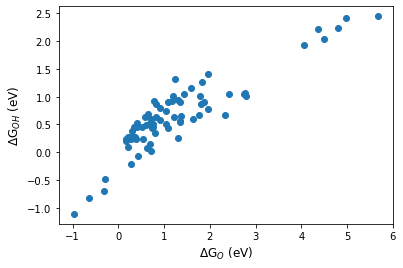

In [8]:
plt.scatter(df2['G_O'],df2['G_OH'])
plt.xlabel('ΔG$_O$ (eV)', fontsize=12)
plt.ylabel('ΔG$_{OH}$ (eV)', fontsize=12)

Text(0, 0.5, 'ΔG$_{OOH}$ (eV)')

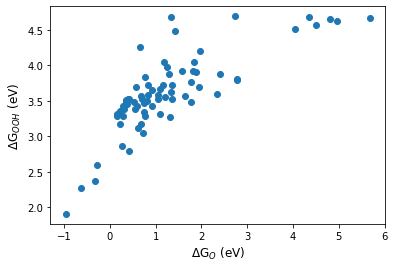

In [9]:
plt.scatter(df2['G_O'],df2['G_OOH'])
plt.xlabel('ΔG$_O$ (eV)', fontsize=12)
plt.ylabel('ΔG$_{OOH}$ (eV)', fontsize=12)

Text(0, 0.5, 'ΔG$_{OOH}$ (eV)')

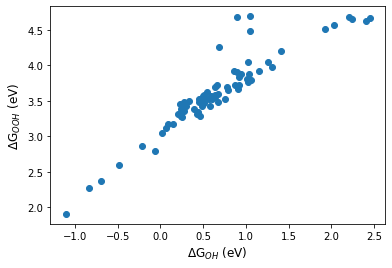

In [10]:
plt.scatter(df2['G_OH'],df2['G_OOH'])
plt.xlabel('ΔG$_{OH}$ (eV)', fontsize=12)
plt.ylabel('ΔG$_{OOH}$ (eV)', fontsize=12)

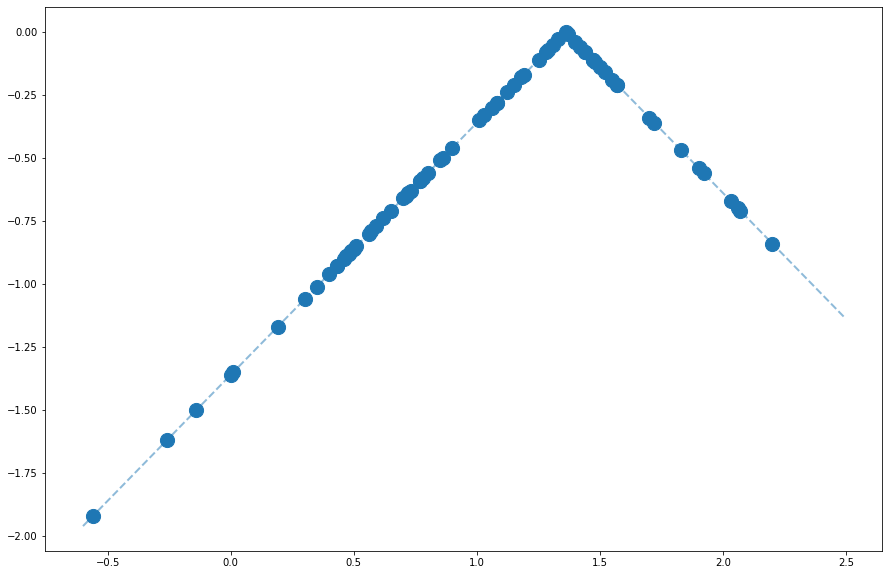

In [11]:
plt.figure(figsize=(15,10))

plt.scatter(df2['G_Cl'],-df2['η_CER'],s=200)

x = np.arange(-0.6,2.5,0.01)
y1 = x-1.36
y2 = 1.36-x
y = np.maximum(y1,y2)
plt.plot(x,-y,'--',linewidth=2,alpha=0.5)

In [12]:
num_N = [4,3,2,'2-t',1,0]
labels = ['MN$_4$C','MN$_3$C','MN$_2$C','MN$_2$C-trans','MN$_1$C','MN$_0$C']
sym = ['o','v','s','*','p','d']
c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#00b3fe','#120458']

Text(0, 0.5, '-η$_{CER}$ (V)')

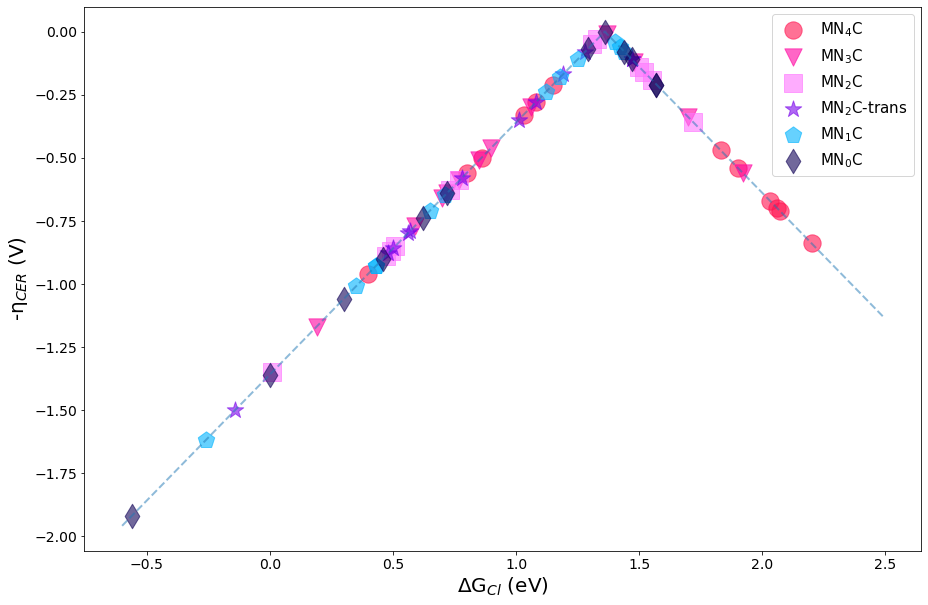

In [13]:
plt.figure(figsize=(15,10))
for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    
    temp_df = df2[is_N]
    
    plt.scatter(temp_df['G_Cl'],-temp_df['η_CER'],s=300, color=c[i], marker= sym[i], alpha=0.6,label=labels[i])
 
plt.plot(x,-y,'--',alpha=0.5,linewidth=2)
plt.legend(fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('ΔG$_{Cl}$ (eV)', fontsize=20)
plt.ylabel('-η$_{CER}$ (V)', fontsize=20)

In [16]:
df2['η_CER'].values

array([0.56, 0.5 , 0.21, 0.47, 0.54, 0.33, 0.71, 0.7 , 0.28, 0.67, 0.84,
       0.96, 0.64, 0.59, 0.51, 0.12, 0.46, 0.77, 0.34, 0.3 , 0.66, 0.56,
       0.01, 1.17, 0.85, 0.59, 0.63, 0.05, 0.03, 0.89, 0.16, 0.14, 0.87,
       0.19, 0.36, 1.35, 0.88, 0.79, 0.58, 0.28, 0.35, 0.8 , 0.08, 0.17,
       0.86, 0.11, 0.11, 1.5 , 0.93, 0.71, 0.65, 0.18, 0.24, 0.93, 0.08,
       0.11, 1.01, 0.04, 0.06, 1.62, 0.9 , 0.74, 0.64, 0.  , 0.07, 1.06,
       0.21, 0.08, 1.36, 0.11, 0.21, 1.92])

In [17]:
!pip install adjustText
from adjustText import adjust_text

Text(93.25, 0.5, '-η$_{CER}$ (V)')

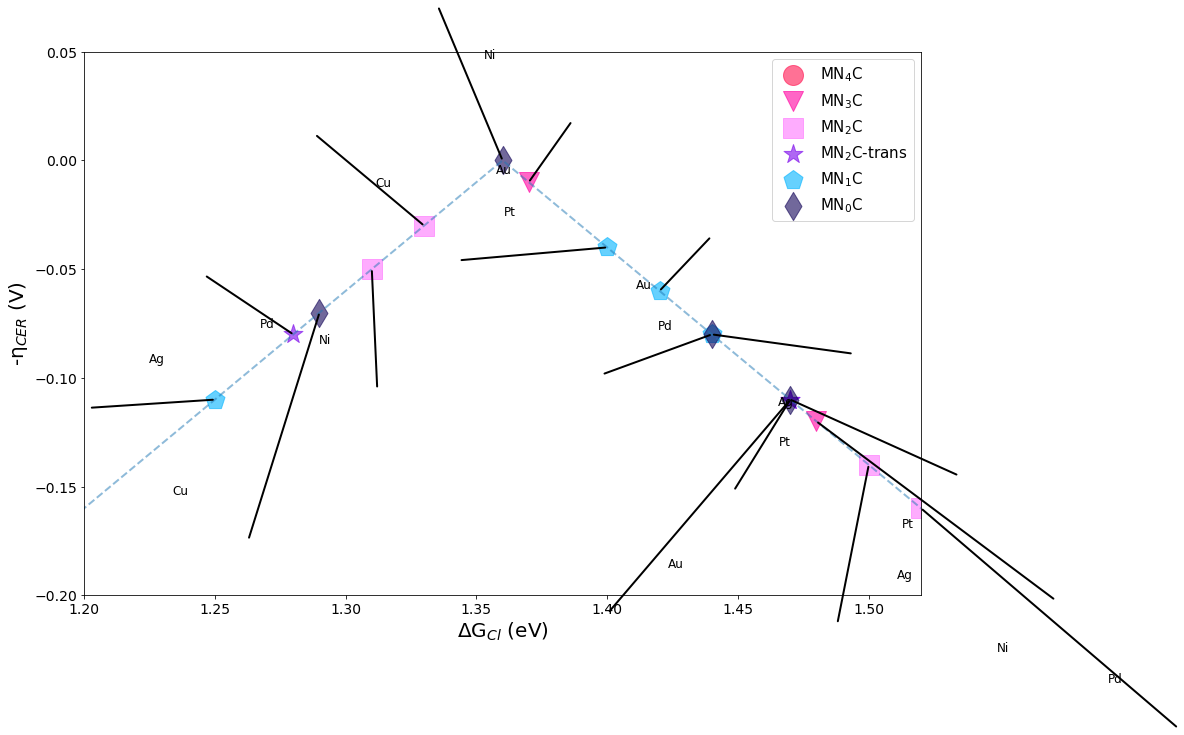

In [23]:
plt.figure(figsize=(15,10))

start = 0
TEXTS=[] 
for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    
    temp_df = df2[is_N]
    #print(temp_df['η_CER'])
    plt.scatter(temp_df['G_Cl'],-temp_df['η_CER'],
                s=400, color=c[i],
                marker= sym[i], alpha=0.6,
                label=labels[i])
    
    for j in range(start, len(temp_df['M'])+start) :
        #print(j,-temp_df['η_CER'][j] )
        if -temp_df['η_CER'][j] >= -0.16 :
            TEXTS.append(plt.text(temp_df['G_Cl'][j], -temp_df['η_CER'][j], str(temp_df['M'][j]), fontsize=12))
            #plt.text(temp_df['G_Cl'][j]-0.0025,-temp_df['η_CER'][j]+0.01,
            #         temp_df['M'][j],fontsize = 16)

            
            
    start = start+12

adjust_text(TEXTS,expand_points=(0.005, 0.005),arrowprops=dict(arrowstyle="-",lw=2))    

plt.plot(x,-y,'--',alpha=0.5,linewidth=2)
plt.legend(fontsize=15)
plt.xlim(1.2,1.52)
plt.ylim(-0.2,0.05)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('ΔG$_{Cl}$ (eV)', fontsize=20)
plt.ylabel('-η$_{CER}$ (V)', fontsize=20)

Text(93.25, 0.5, '-η$_{CER}$ (V)')

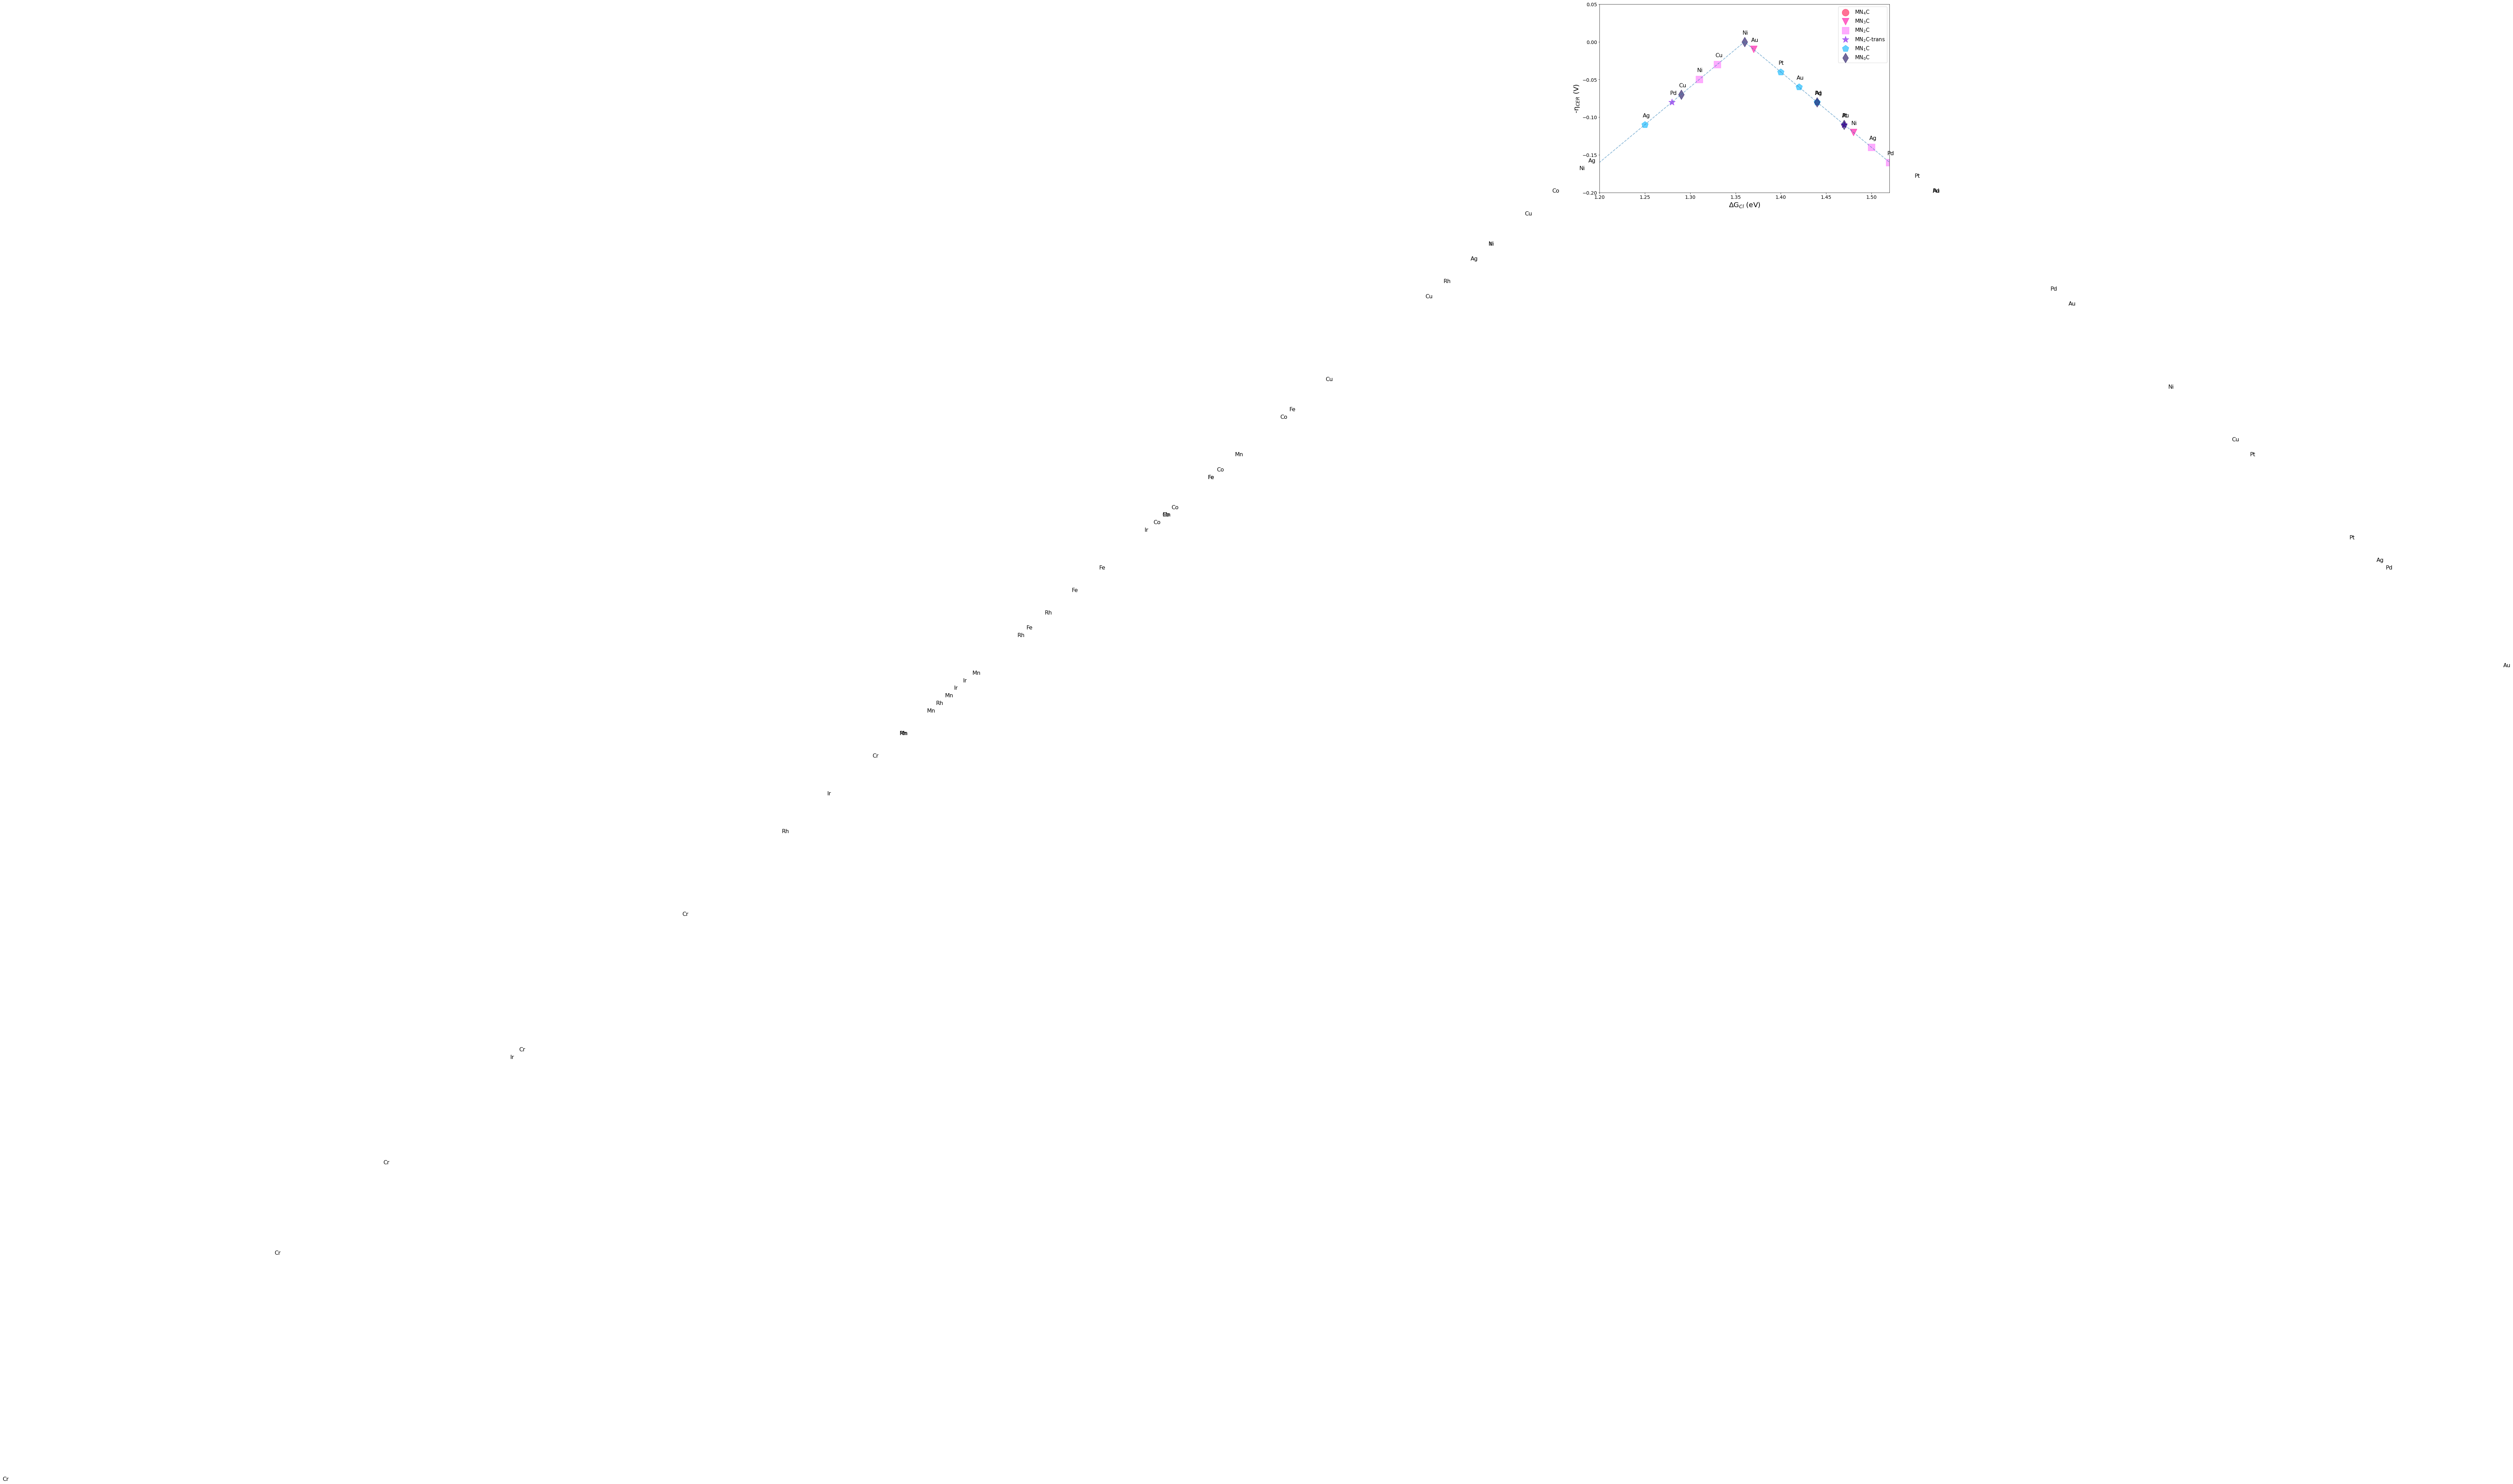

In [24]:
plt.figure(figsize=(15,10))

start = 0
TEXTS=[] 
for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    
    temp_df = df2[is_N]
    #print(temp_df['η_CER'])
    plt.scatter(temp_df['G_Cl'],-temp_df['η_CER'],
                s=400, color=c[i],
                marker= sym[i], alpha=0.6,
                label=labels[i])
    
    for j in range(start, len(temp_df['M'])+start) :
            plt.text(temp_df['G_Cl'][j]-0.0025,-temp_df['η_CER'][j]+0.01,
                     temp_df['M'][j],fontsize = 16)

            
            
    start = start+12

adjust_text(TEXTS,expand_points=(0.005, 0.005),arrowprops=dict(arrowstyle="-",lw=2))    

plt.plot(x,-y,'--',alpha=0.5,linewidth=2)
plt.legend(fontsize=15)
plt.xlim(1.2,1.52)
plt.ylim(-0.2,0.05)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('ΔG$_{Cl}$ (eV)', fontsize=20)
plt.ylabel('-η$_{CER}$ (V)', fontsize=20)